In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# import urllib2
import shutil
import re
import time
import json
import unicodedata
import html

In [14]:
f = open("./data/yogajournal.json")
yoga_json = json.load(f)
urls = []
for pose in yoga_json:
    urls.append(yoga_json[pose]["url"])

In [4]:
body_parts = ['abs', 'ankles', 'arms', 'back', 'belly', 'bladder', 'brain', 'chest', 'feet', 'glutes', 'hamstrings', 'hands', 'heart', 'hips', 'knees', 'legs', 'liver', 'lower-back', 'lungs', 'neck', 'pelvis', 'shoulders', 'spine', 'thyroid', 'thighs']

In [6]:
# def download_image(image):
#     response = requests.get(image[0], stream=True)
#     realname = ''.join(e for e in image[1] if e.isalnum())
    
#     file = open("/Users/teresad/Desktop/4300project/images/{}.jpg".format(realname), 'wb')
    
#     response.raw.decode_content = True
#     shutil.copyfileobj(response.raw, file)
#     del response

In [37]:
fix_chars = ['\x92']
remove_string = 'GO BACK TO A-Z POSE FINDER'

def scrape_page(url, n):
    print("Starting scrape on Page " + str(n))
    URL2 = url
    page = requests.get(URL2)
    soup = BeautifulSoup(page.content, 'html.parser')
    headers = soup.find_all('h3')
    headers_lst = []
    for head in headers:
        pass

    results = soup.find_all('p')
    results_lst = []
    for res in results:
        words  = res.text
        cleaned = html.unescape(words)
        cleaned = unicodedata.normalize("NFKD", cleaned)
        cleaned = cleaned.replace('x92', '\'')
        cleaned = str(cleaned.encode("ascii", "ignore"))
        if cleaned != remove_string:
            results_lst.append(cleaned)
#     print(results_lst)
#     print("#" * 100)
    return results_lst

scrape_dict = dict()
counter = 1
for url in urls:
    results_lst = scrape_page(url, counter)
    counter += 1
    scrape_dict[url] = results_lst
    
for pose in yoga_json:
    url = yoga_json[pose]["url"]
    yoga_json[pose]["description"] = scrape_dict[url]



Starting scrape on Page 1
Starting scrape on Page 2
Starting scrape on Page 3
Starting scrape on Page 4
Starting scrape on Page 5
Starting scrape on Page 6
Starting scrape on Page 7
Starting scrape on Page 8
Starting scrape on Page 9
Starting scrape on Page 10
Starting scrape on Page 11
Starting scrape on Page 12
Starting scrape on Page 13
Starting scrape on Page 14
Starting scrape on Page 15
Starting scrape on Page 16
Starting scrape on Page 17
Starting scrape on Page 18
Starting scrape on Page 19
Starting scrape on Page 20
Starting scrape on Page 21
Starting scrape on Page 22
Starting scrape on Page 23
Starting scrape on Page 24
Starting scrape on Page 25
Starting scrape on Page 26
Starting scrape on Page 27
Starting scrape on Page 28
Starting scrape on Page 29
Starting scrape on Page 30
Starting scrape on Page 31
Starting scrape on Page 32
Starting scrape on Page 33
Starting scrape on Page 34
Starting scrape on Page 35
Starting scrape on Page 36
Starting scrape on Page 37
Starting s

In [38]:
dump_loc = open("./description_yoga_json.json", "w")
json.dump(yoga_json, dump_loc)
dump_loc.close()

In [5]:
data = {'body_part':[], 'name': [], 'url': [], 'image_name': []}

for bp in body_parts: 
    print("bp")
    URL2 = 'https://www.yogajournal.com/poses/anatomy/' + bp
    page = requests.get(URL2)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    results = soup.find(class_ ='m-tile-hub m-component-stack mm-component-stack--is-stacked mm-component-stack--has-footer')
    if (results!= None):
        print(results)
        poses = results.find_all('div', class_='l-grid--item')
        for pose in poses: 
            name_elem = pose.find('h2', class_='m-ellipsis--text m-card--header-text')
            if (name_elem != None):
                x = name_elem.text.strip()
                data['body_part'].append(bp)
                data['name'].append(x)

                link = pose.find('phoenix-super-link')
                if (link != None):
                    url = link.get("href")

                    URL_pose = 'https://www.yogajournal.com' + url
                    data['url'].append(URL_pose)
                else: 
                    data['url'].append('None')
                    
                image_elem = pose.find('a', class_= 'm-card--image-link')
                if (image_elem != None):
                    image_tag = image_elem.findChildren("img")
                    image_info = ((image_tag[0]["src"], image_tag[0]["alt"]))
                    download_image(image_info)
                    data['image_name'].append((''.join(e for e in image_info[1] if e.isalnum())) +'.jpg')
                else: 
                    data['image_name'].append('None')
    else:
        print("no results")
    time.sleep(5)

    

bp
<section class="m-tile-hub m-component-stack mm-component-stack--is-stacked mm-component-stack--has-footer"><section class="m-card-group-container" data-first-group-size="9" data-group-size="9"><section class="m-card-group"><div class="m-card-group--content l-grid lm-grid--density-standard lm-grid--standard-cards"><div class="l-grid--item"><phoenix-super-link href="/poses/full-boat-pose"><article class="m-card mm-card--type-standard mm-card--density-standard" role="article"><div class="m-card--media"><a class="m-card--image-link" href="/poses/full-boat-pose" onclick="return phoenixTrackClickEvent(this, event);" phx-track-id="Image" title="Boat Pose"><phoenix-picture><picture class="is-waiting-to-load"><source data-srcset="https://www.yogajournal.com/.image/ar_16:9%2Cc_fill%2Ccs_srgb%2Cg_faces:center%2Cq_auto:good%2Cw_320/MTQ3MTU0NDA5MjA4NDI0MjM5/editedboathp_292_8_bjk.webp 320w, https://www.yogajournal.com/.image/ar_16:9%2Cc_fill%2Ccs_srgb%2Cg_faces:center%2Cq_auto:good%2Cw_640/MTQ3

NameError: name 'download_image' is not defined

In [55]:
# print(len(data['name']))
# print(data)
df = pd.DataFrame(data, columns = ['body_part','name', 'url', 'image_name'])
df.head(10)

,body_part,name,url,image_name
0,abs,Boat Pose,https://www.yogajournal.com/poses/full-boat-pose,BoatPose.jpg
1,abs,Bridge Pose,https://www.yogajournal.com/poses/bridge-pose,BridgePoseGISELLEMARI.jpg
2,abs,Crane (Crow) Pose,https://www.yogajournal.com/poses/crane-pose,editcrowHP2929bjk.jpg
3,abs,Dolphin Plank Pose,https://www.yogajournal.com/poses/dolphin-plan...,forearmplank.jpg
4,abs,Eight-Angle Pose,https://www.yogajournal.com/poses/eight-angle-...,Rinaeightangleastavakrasana.jpg
5,abs,Extended Puppy Pose,https://www.yogajournal.com/poses/extended-pup...,PuppyPose.jpg
6,abs,Extended Side Angle Pose,https://www.yogajournal.com/poses/extended-sid...,ExtendedSideAngle.jpg
7,abs,Extended Triangle Pose,https://www.yogajournal.com/poses/extended-tri...,extendedtriangle.jpg
8,abs,Firefly Pose,https://www.yogajournal.com/poses/firefly-pose,FireflyPose.jpg
9,abs,Fish Pose,https://www.yogajournal.com/poses/fish-pose,FishPose.jpg


In [56]:
df.to_json(r'\yogajournal.json')

In [61]:
df2 = df.set_index('name')


In [77]:
import json

In [78]:
def convert_data_to_dic(x):
    num = len(x['body_part'])
    dic = {}
    for i in range(num):
        name = x['name'][i]
        if not(name in dic):
            dic[name] = {'body_part': [x['body_part'][i]], 'url' : x['url'][i], 'image_name' : x['image_name'][i]}
        elif name in dic:
            dic[name]['body_part'].append(x['body_part'][i])
    
    return json.dumps(dic)

In [1]:
x = convert_data_to_dic(data)
print(x)

NameError: name 'convert_data_to_dic' is not defined

In [81]:
df['image_name'].nunique()

96

In [9]:
df2 = df.groupby('body_part').count()

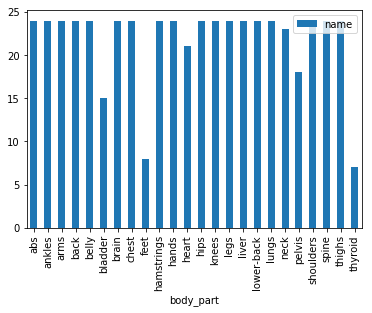

In [12]:
import matplotlib.pyplot as plt
df2.plot.bar()